![alt text](logo.png "Title")

# Analyze Covid-19 Situation in Vietnam (7/7/2021)
This data is published in
https://data.opendevelopmentmekong.net//dataset/coronavirus-covid-19-cases-in-vietnam

**Table of Contents**
* [Import modules](#1)
* [Read covid-19 data](#2)
* [Summary information about data](#3)
* [Which age group have are more likely to infect covid?](#4)
* [Who are more likely to infect covid? Male or Female?](#5)
* [Are there any foreigners infected by covid-19 in Vietnam?](#6)
* [How many patients are recovered?](#7)
* [Which location is infected the most by covid-19 in Vietnam?](#8)

<a id ="1"></a>
#### ***1. Import modules***

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['font.family'] = "serif"

<a id ="2"></a>
#### ***2. Read covid-19 data***

In [2]:
data = pd.read_csv("datasets/patient_information.csv")
data.head()

,ID,Patient,Age,Gender,Location,Status,Nationality
0,1,BN1,0,Male,Ho Chi Minh,Recovered,Chinese
1,2,BN2,0,Male,Ho Chi Minh,Recovered,Chinese
2,3,BN3,0,Female,Thanh Hoa,Recovered,Vietnamese
3,4,BN4,0,Male,Vinh Phuc,Recovered,Vietnamese
4,5,BN5,0,Female,Vinh Phuc,Recovered,Vietnamese


<a id ="3"></a>
#### ***3. Summary information about data***

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19933 entries, 0 to 19932
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           19933 non-null  int64 
 1   Patient      19933 non-null  object
 2   Age          19933 non-null  int64 
 3   Gender       19931 non-null  object
 4   Location     19933 non-null  object
 5   Status       19926 non-null  object
 6   Nationality  19926 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.1+ MB


In [4]:
data.isnull().sum()

ID             0
Patient        0
Age            0
Gender         2
Location       0
Status         7
Nationality    7
dtype: int64

In [5]:
data.describe()

,ID,Age
count,19933.000000,19933.000000
mean,9967.000000,25.770682
std,5754.305794,19.755185
min,1.000000,0.000000
25%,4984.000000,8.000000
50%,9967.000000,27.000000
75%,14950.000000,38.000000
max,19933.000000,450.000000


In [6]:
data.describe(include= "O")

,Patient,Gender,Location,Status,Nationality
count,19933,19931,19933,19926,19926
unique,19933,3,59,4,47
top,BN2442,Not defined,Ho Chi Minh,Being treated,Vietnamese
freq,1,17158,6372,11810,19685


**Comment**:
- 19933 patients so far
- Missing values: Gender (2), Status (7), Nationality (7)
- Noise in age -> detect noise and drop them
- A lot of undefined gender
- Hochiminh has the most patients (6372)
- Being treated about 11810 patients
- Has another nationality

<a id ="4"></a>
#### ***4. Which age group have are more likely to infect covid?***

In [7]:
# Clean data
age_df = data[(data["Age"] > 0) & (data["Age"] <= 100)]

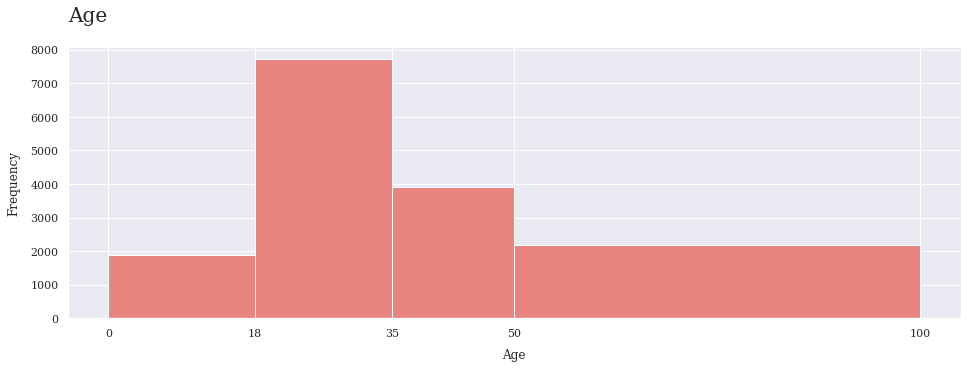

In [8]:
# Age
plt.figure(figsize= (16,5))
plt.hist(x= age_df["Age"], bins= [0, 18, 35, 50, 100], color= "#E98580")
plt.title("Age", fontsize= 20, loc= "left", pad= 25)
plt.xticks(ticks= [0, 18, 35, 50, 100])
plt.xlabel("Age", labelpad=10)
plt.ylabel("Frequency", labelpad=10)
plt.savefig("abc.png")
plt.show()

In [9]:
age_df.describe(percentiles=[0.05, 0.95])

,ID,Age
count,15685.000000,15685.000000
mean,11796.509149,32.656487
std,4897.787716,15.401548
min,3034.000000,1.000000
5%,3921.200000,8.000000
50%,12082.000000,31.000000
95%,19147.800000,61.000000
max,19933.000000,99.000000


**Comment**: 
- Young aldults are more likely to infect covid than elderly people
- About 5%, <8 years old
- About 5%, >61 years old
- Most around 32 years old

<a id ="5"></a>
#### ***5. Who are more likely to infect covid? Male or Female?***

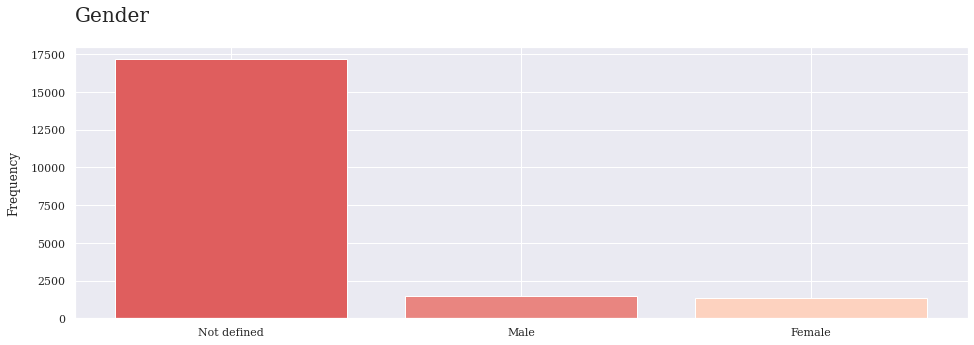

In [10]:
gender_sr = data["Gender"].dropna()
gender_cnt = gender_sr.value_counts()

# Gender
plt.figure(figsize= (16,5))
plt.bar(x= gender_cnt.index, height = gender_cnt, color= ["#DF5E5E", "#E98580", "#FDD2BF"])

plt.title("Gender", fontsize= 20, loc= "left", pad= 25)
plt.ylabel("Frequency", labelpad=10)
plt.show()

**Comment**: 
- No information about who are more likely to infect covid because Not Defined is dominant


<a id ="6"></a>
#### ***6. Are there any foreigners infected by covid-19 in Vietnam?***

In [11]:
def get_others(nation):
    if nation != "Vietnamese":
        nation = "Others"
    return nation

nation_cnt = data['Nationality'].apply(get_others).value_counts()

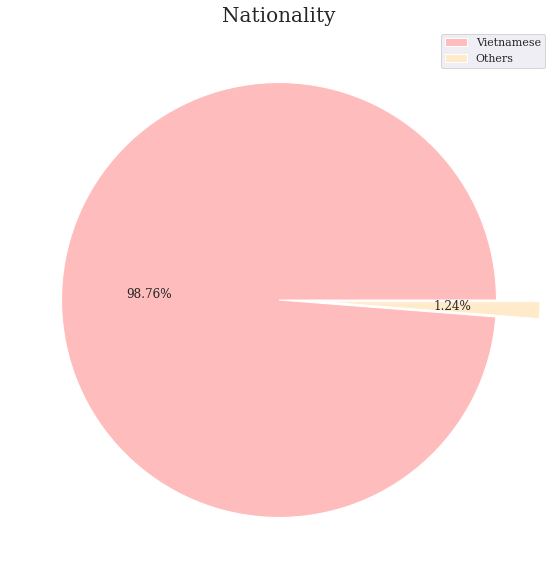

In [12]:
plt.figure(figsize= (10,10))
plt.pie(x= nation_cnt, colors= ["#FFBCBC", "#FFEACA"], autopct= "%.2f%%", explode= [0, 0.2])
plt.title("Nationality", fontsize= 20)
plt.legend(labels= nation_cnt.index)
plt.show()

**Comment**: 
- There are 1.24% of foreigners infected by covid-19 in Vietnam


<a id ="7"></a>
#### ***7. How many patients are recovered?***

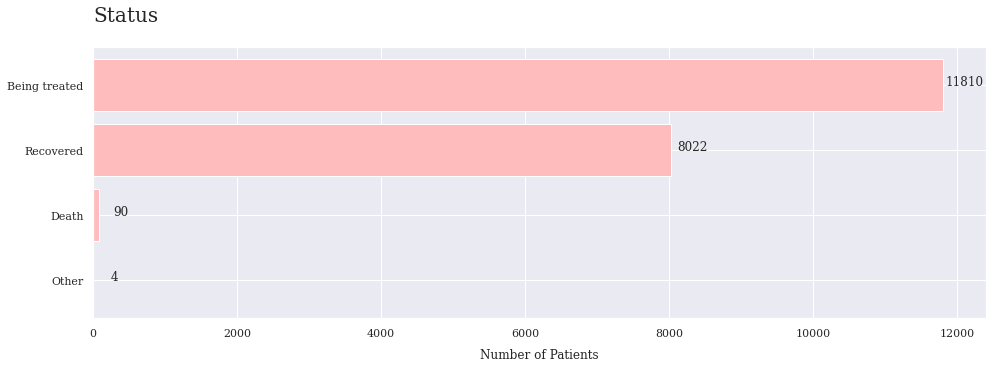

In [13]:
status_cnt = data["Status"].value_counts().sort_values()

plt.figure(figsize= (16,5))
status_bar = plt.barh(y= status_cnt.index, width= status_cnt, color= "#FFBCBC")
plt.title("Status", fontsize= 20, loc= "left", pad= 25)
plt.xlabel("Number of Patients", labelpad=10)


for i in range(len(status_bar)):
    points = status_bar.patches[i].get_bbox().get_points()
    x0, y0, x1, y1 = points[0,0], points[0, 1], points[1,0], points[1,1]
    txt_x = x1 - x0
    txt_y = (y1 + y0)/2

    plt.text(x= txt_x + 300, y=txt_y, s= round(txt_x), ha= "center")

plt.show()

**Comment:**
- Around 12000 patients have being treated
- About 8000 patients already recovered

<a id ="8"></a>
#### ***8. Which location is infected the most by covid-19 in Vietnam?***

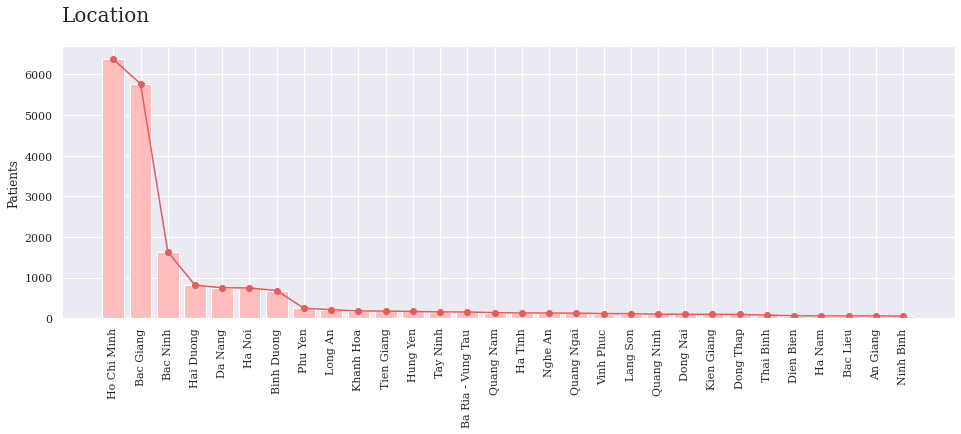

In [14]:
loc_cnt = data["Location"].value_counts().head(30)

plt.figure(figsize= (16,5))
plt.bar(x= loc_cnt.index, height= loc_cnt, color= "#FFBCBC")
plt.plot(loc_cnt.index, loc_cnt, color= "#DF5E5E", marker= "o")

plt.title("Location", loc= "left", fontsize= 20, pad= 25)
plt.xticks(rotation= 90)
plt.ylabel("Patients")
plt.show()

**Comment:**
- Ho Chi Minh is in top 1 infected by covid-19
- Following that, Bac Giang is in danger with around 6000 patients as well

# Thank you!